In [135]:
import json
from zipfile import ZipFile 
import json
import networkx as nx
import time
import datetime
from statistics import mean 
from statistics import median

## Read json files

In [6]:
with open('../data/steph_n_andrew/submissions.json', 'r') as f:
    submissions = json.load(f)

<class 'dict'>


In [ ]:
with open('../data/steph_n_andrew/comments.json', 'r') as f:
    comments = json.load(f)

In [134]:
print("number of submissions:", len(submissions))
print("number of submissions:", len(comments))

number of submissions: 1750123
number of submissions: 20649321


## See some samples

In [411]:
#see sample submissions
for i, submission in enumerate(submissions):
    print(type(submissions[submission]))
    print(submission, submissions[submission])
    if i > 2:
        break

<class 'dict'>
4jkdhy {'body': 'Original thread: https://redd.it/4iwfsx\nAfter the execution, the malware send some data to bnaf12.no-ip.biz.  This is the attacker website http://paulie[.]rocks/\n\nhttp://imgur.com/pPinOgK\n\nhttps://bitcointalk.org/index.php?action=profile;u=838056\nhttps://www.reddit.com/user/PaulieGolding\nhttps://bazaarbay.org/@pauliegolding\nhttps://www.bustabit.com/user/PaulieGolding', 'author': 'munteanualex_ro', 'title': 'I found some information about the guy who stole $10,000 in cryptos', 'comment_id': ['d37fjem', 'd37gxkg', 'd37k317', 'd37kbpv', 'd37lxoy', 'd37lz3g', 'd38qxcv', 'd39fzj8'], 'subreddit': 'btc', 'time': 1463390903}
<class 'dict'>
3gqjbs {'body': 'The next MIT swapfest is 16-Aug-15 &amp; I accept #Bitcoin at my tables. I think I\'m the only one to accept Bitcoin at this flea market. Just look for the "Bitcoin accepted here" sings on the out side tables.', 'author': '[deleted]', 'title': 'Bitcoins &amp; MIT swapfest', 'comment_id': ['cu0hw0x'], '

In [ ]:
#see sample comments
for i, comment in enumerate(comments):
    print(comments[comment])
    if i > 2:
        break

## Global Variables

In [179]:
start_epoch=int(datetime.datetime(2017, 8, 1).timestamp())
end_epoch=int(datetime.datetime(2018, 4, 30).timestamp())
bot_identifier_text = 'I am a bot, and this action was performed automatically.' # maybe I should use "author": "AutoModerator"
print("Variables initialized")

Variables initialized


## Adding submissions to network

In [180]:
start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

cascades = nx.DiGraph()
sub_added_counter = 0
corupt_sub_counter=0

with open("bitcoin_cascades_subs_from_dic.txt", "w") as f:
    for i, submission in enumerate(submissions):
        sub_id = submission
        try:
            epoch = int(submissions[submission]['time'])
            subreddit = submissions[submission]['subreddit']
            author = submissions[submission]['author']

        except TypeError:
            corupt_sub_counter += 1

        if epoch >= start_epoch and epoch <= end_epoch and subreddit.lower() == 'bitcoin':
            cascades.add_node(sub_id, created_utc=epoch, type='s', subreddit= subreddit.lower(),
                             author=author)
            f.write(submission + ";" + str(submissions[submission]) + "\n")
            sub_added_counter += 1

        if i % 200000 == 0:
            print("Total ", i, "th submission. Added", sub_added_counter, "submissions")

print("Number of corrupted items: ", corupt_sub_counter)
print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-09-30 19:19:21.825628
Total  0 th submission. Added 0 submissions
Total  200000 th submission. Added 24613 submissions
Total  400000 th submission. Added 48700 submissions
Total  600000 th submission. Added 73092 submissions
Total  800000 th submission. Added 96698 submissions
Total  1000000 th submission. Added 119283 submissions
Total  1200000 th submission. Added 142848 submissions
Total  1400000 th submission. Added 165318 submissions
Total  1600000 th submission. Added 188388 submissions
Number of corrupted items:  51
Finished at 2019-09-30 19:19:29.522429
Total time: --- 7.697 seconds ---


In [181]:
print("After adding submissions")
print(len(cascades.nodes))
print(len(cascades.edges))

After adding submissions
206198
0


## Adding Comments to network

In [182]:
start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

com_added_counter = 0
corupt_com_counter=0
bot_com_counter = 0

with open("bitcoin_cascades_comms_from_dic.txt", "w") as f:
    for i, comment in enumerate(comments):
        com_id = comment
        try:
            com_epoch = int(comments[comment]['time'])
            com_subreddit = comments[comment]['subreddit']
            com_parent_id = comments[comment]['parent_id'][3:]
            body = comments[comment]['body']
            author = comments[comment]['author_id']

        except TypeError:
            corupt_com_counter += 1
            
        if com_epoch >= start_epoch and com_epoch <= end_epoch and com_subreddit.lower() == 'bitcoin':
            if bot_identifier_text in body :
                bot_com_counter +=1
                continue
                
            cascades.add_node(comment, created_utc=com_epoch, type='c', subreddit= com_subreddit.lower(),
                             author=author)
            cascades.add_edge(comment, com_parent_id)
            f.write(comment + ";" + str(comments[comment]) + "\n")
            com_added_counter += 1

        if i % 2000000 == 0:
            print("Total ", i, "th comments. Added", com_added_counter, "comments")

print("Number of corrupted items: ", corupt_com_counter)
print("Number of bot comments: ", bot_com_counter)
print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-09-30 19:19:45.286050
Total  0 th comments. Added 0 comments
Total  2000000 th comments. Added 221075 comments
Total  4000000 th comments. Added 439559 comments
Total  6000000 th comments. Added 654533 comments
Total  8000000 th comments. Added 869637 comments
Total  10000000 th comments. Added 1083110 comments
Total  12000000 th comments. Added 1304964 comments
Total  14000000 th comments. Added 1525453 comments
Total  16000000 th comments. Added 1743245 comments
Total  18000000 th comments. Added 1958665 comments
Total  20000000 th comments. Added 2172947 comments
Number of corrupted items:  0
Number of bot comments:  925
Finished at 2019-09-30 19:21:52.652018
Total time: --- 127.3662 seconds ---


In [183]:
print("After adding comments")
print(len(cascades.nodes))
print(len(cascades.edges))

After adding comments
2450581
2242070


In [184]:
#Store the network
nx.write_edgelist(cascades,'cascades_bitcoin_20170801_20180430.edgelist',
                  data=['created_utc','type', 'subreddit','author'])

In [263]:
nx.write_gpickle(cascades,'cascades_bitcoin_20170801_20180430.gpickle')

## Calculate Metrics

In [185]:
start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

components = list(nx.weakly_connected_components(cascades))
cascades_count=0

negative_initial_delay_cascade_counter=0
zero_initial_delay_cascade_counter=0
initial_delays = []

negative_lifetime_cascade_counter=0
zero_lifetime_cascade_counter=0
lifetimes = []

volume_of_cascades = []
density_of_cascades = []
audience_size_of_cascades =[]

print("Found", len(components), "components")

for i, c in enumerate(components) :
    c_subgraph = cascades.subgraph(c)
    
    root_post_id, root_epoch = None, 0
    authors_set = set()
    
    for (node, val) in c_subgraph.out_degree():
        if val == 0 and 'type' in c_subgraph.nodes[node] and c_subgraph.nodes[node]['type'] == 's':
            root_post_id = node
            if 'author' in c_subgraph.nodes[node]:
                authors_set.add(c_subgraph.nodes[node]['author'])
            break
    
    if root_post_id is None:
        continue
        
    if 'created_utc' in c_subgraph.nodes[root_post_id]:
        root_epoch = int(c_subgraph.nodes[root_post_id]['created_utc'])
    
    first_c, first_c_epoch = None, 1569968106
    last_c, last_c_epoch = None, 0
    
    for n in c_subgraph.predecessors(root_post_id):
        if 'created_utc' in c_subgraph.nodes[n]:
            epoch = int(c_subgraph.nodes[n]['created_utc'])
            
        if 'author' in c_subgraph.nodes[n]:
            authors_set.add(c_subgraph.nodes[n]['author'])
                
        #find first comment
        if epoch < first_c_epoch:
            first_c, first_c_epoch = n, epoch
        
        #find last comment
        if epoch > last_c_epoch:
            last_c, last_c_epoch = n, epoch
    
    #Initial delay
    if root_post_id is not None and first_c is not None:
        initial_delay = first_c_epoch - root_epoch
        
        if initial_delay < 0:
            negative_initial_delay_cascade_counter += 1
            continue
            
        #It is a cascade!! There's an initial post, first comment, and the initial delay is non-negative
        cascades_count += 1
        volume_of_cascades.append(len(c_subgraph.nodes))
        density_of_cascades.append(nx.density(c_subgraph))
        audience_size_of_cascades.append(len(authors_set))        
        initial_delays.append(initial_delay)
        
        if initial_delay == 0:
            zero_initial_delay_cascade_counter += 1

    #lifetime
    if root_post_id is not None and last_c is not None:
        lifetime = last_c_epoch - root_epoch
        
        if lifetime < 0:
            negative_lifetime_cascade_counter += 1
            continue
            
        lifetimes.append(lifetime)
        
        if lifetime == 0:
            zero_lifetime_cascade_counter += 1

    
#         if cascades_count % 5000 == 0:
#             print(cascades_count+1, "th cascade; root node:", root_post_id, root_epoch,
#                   "First comment:", first_c, first_c_epoch, "Initial delay:", initial_delay)

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-09-30 19:22:22.178422
Found 208511 components
Finished at 2019-09-30 19:23:52.117670
Total time: --- 89.9398 seconds ---


## Print Metrics results

In [186]:
print(cascades_count, "cascades identified")
print(negative_initial_delay_cascade_counter, "cascades with negative initial delay; excluded from analysis")
print(zero_initial_delay_cascade_counter, "cascades with zero initial delay.")

print("Initial Delays")
print("\t Mean:", round(mean(initial_delays), 2))
print("\t Median:", round(median(initial_delays), 2))
print("\t Max:", max(initial_delays))
print("\t Min:", min(initial_delays))

print(negative_lifetime_cascade_counter, "cascades with negative lifetime; excluded from analysis")
print(zero_lifetime_cascade_counter, "cascades with zero lifetime.")

print("Lifetimes")
print("\t Mean:", round(mean(lifetimes), 2))
print("\t Median:", round(median(lifetimes), 2))
print("\t Max:", max(lifetimes))
print("\t Min:", min(lifetimes))

print("Volume (number of nodes)")
print("\t Mean:", round(mean(volume_of_cascades), 2))
print("\t Median:", round(median(volume_of_cascades), 2))
print("\t Max:", max(volume_of_cascades))
print("\t Min:", min(volume_of_cascades))

print("Density")
print("\t Mean:", round(mean(density_of_cascades), 2))
print("\t Median:", round(median(density_of_cascades), 2))
print("\t Max:", max(density_of_cascades))
print("\t Min:", min(density_of_cascades))

print("Audience Size (unique users)")
print("\t Mean:", round(mean(audience_size_of_cascades), 2))
print("\t Median:", round(median(audience_size_of_cascades), 2))
print("\t Max:", max(audience_size_of_cascades))
print("\t Min:", min(audience_size_of_cascades))

print(nx.info(cascades))

136407 cascades identified
6 cascades with negative initial delay; excluded from analysis
17 cascades with zero initial delay.
Initial Delays
	 Mean: 13050.68
	 Median: 344
	 Max: 15107722
	 Min: 0
0 cascades with negative lifetime; excluded from analysis
6 cascades with zero lifetime.
Lifetimes
	 Mean: 167381.65
	 Median: 5319
	 Max: 15550420
	 Min: 0
Volume (number of nodes)
	 Mean: 17.37
	 Median: 6
	 Max: 5103
	 Min: 2
Density
	 Mean: 0.22
	 Median: 0.17
	 Max: 0.5
	 Min: 0.0001959631589261219
Audience Size (unique users)
	 Mean: 6.29
	 Median: 4
	 Max: 2000
	 Min: 1
Name: 
Type: DiGraph
Number of nodes: 2450581
Number of edges: 2242070
Average in degree:   0.9149
Average out degree:   0.9149


### Connecting to prices

In [1]:
import json
import requests 
import networkx as nx
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

api_base_url = 'https://api.coindesk.com/v1/bpi/historical/close.json'
start_date='2017-09-01'
end_date='2018-03-30'
params='?start=' + start_date + '&end=' + end_date

url = api_base_url + params
print("URL:", url)

r = requests.get(url = url)
if r.status_code == 200:
    prices_json_obj = json.loads(r.text)
    prices_dic = prices_json_obj['bpi']

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-22 14:33:25.710941
URL: https://api.coindesk.com/v1/bpi/historical/close.json?start=2017-09-01&end=2018-03-30
Finished at 2019-10-22 14:33:25.947339
Total time: --- 0.2366 seconds ---


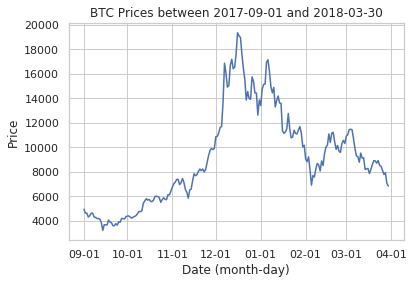

In [229]:
import matplotlib.dates as mdates

Y = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date(), prices_dic.keys()))

fig, ax = plt.subplots()
ax.plot(Y, prices_dic.values())
plt.xlabel('Date (month-day)')
plt.ylabel('Price')
plt.title('BTC Prices between ' + start_date + ' and ' + end_date)

format_xdata = mdates.DateFormatter('%m-%d')

#max_yticks = 8
#xloc = plt.MaxNLocator(max_yticks)
#ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)


plt.show()

In [489]:
### Create timeseries from lifetime, initial delay, volume, audience size, density of cascades

start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

components = list(nx.weakly_connected_components(cascades))
cascades_count=0

initial_delays_means = dict()
lifetimes_means = dict()
volume_of_cascades_means = dict()
density_of_cascades_means = dict()
audience_size_of_cascades_means = dict()

print("Found", len(components), "components")

for day in Y:
    
    initial_delays = []
    lifetimes = []
    volume_of_cascades = []
    density_of_cascades = []
    audience_size_of_cascades =[]
    
    for i, c in enumerate(components) :
        c_subgraph = cascades.subgraph(c)

        root_post_id, root_epoch = None, 0
        authors_set = set()
        active_cascade = False

        for (node, val) in c_subgraph.out_degree():
            if val == 0 and 'type' in c_subgraph.nodes[node] and c_subgraph.nodes[node]['type'] == 's':
                root_post_id = node
                if 'author' in c_subgraph.nodes[node]:
                    authors_set.add(c_subgraph.nodes[node]['author'])
                break

        if root_post_id is None:
            continue

        if 'created_utc' in c_subgraph.nodes[root_post_id]:
            root_epoch = int(c_subgraph.nodes[root_post_id]['created_utc'])

        first_c, first_c_epoch = None, 1569968106
        last_c, last_c_epoch = None, 0

        for n in c_subgraph.predecessors(root_post_id):
            node_created_date = None
            if 'created_utc' in c_subgraph.nodes[n]:
                epoch = int(c_subgraph.nodes[n]['created_utc'])
                node_created_date = datetime.datetime.utcfromtimestamp(epoch).date()
            if not active_cascade and node_created_date is not None and node_created_date == day:
                active_cascade = True
                
            if 'author' in c_subgraph.nodes[n]:
                authors_set.add(c_subgraph.nodes[n]['author'])

            #find first comment
            if epoch < first_c_epoch:
                first_c, first_c_epoch = n, epoch

            #find last comment
            if epoch > last_c_epoch:
                last_c, last_c_epoch = n, epoch

        cascade_size = len(c_subgraph.nodes)
        if active_cascade and cascade_size > 1:
            #Initial delay
            #No need to check root_post_id as it's been checked already
            if first_c is not None:
                initial_delay = first_c_epoch - root_epoch

                if initial_delay < 0:
                    continue

                #It is a cascade!! There's an initial post, first comment, and the initial delay is non-negative
                cascades_count += 1
                volume_of_cascades.append(len(c_subgraph.nodes))
                density_of_cascades.append(nx.density(c_subgraph))
                audience_size_of_cascades.append(len(authors_set))        
                initial_delays.append(initial_delay)

            #lifetime
            if last_c is not None:
                lifetime = last_c_epoch - root_epoch

                if lifetime >= 0:
                    lifetimes.append(lifetime)
            
    initial_delays_means[day] = round(mean(initial_delays), 2)
    lifetimes_means[day] = round(mean(lifetimes), 2)
    volume_of_cascades_means[day] = round(mean(volume_of_cascades), 2)
    density_of_cascades_means[day] = round(mean(density_of_cascades), 2)
    audience_size_of_cascades_means[day] = round(mean(audience_size_of_cascades), 2)
    
#         if cascades_count % 5000 == 0:
#             print(cascades_count+1, "th cascade; root node:", root_post_id, root_epoch,
#                   "First comment:", first_c, first_c_epoch, "Initial delay:", initial_delay)

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-20 16:10:37.433382
Found 208511 components
Finished at 2019-10-20 18:22:32.917364
Total time: --- 7915.4852 seconds ---


In [496]:
import json

audience_size_of_cascades_means_str_keys = {k.isoformat(): v for k, v in audience_size_of_cascades_means.items()}
json_d = json.dumps(audience_size_of_cascades_means_str_keys)
f = open("audience_size_of_cascades_means_20170901_20180330.json","w")
f.write(json_d)
f.close()

In [497]:
price_X = list([prices_dic[k.isoformat()] for k in Y])
price_X_norm = normalize(np.array(price_X))

In [504]:
initial_delays_means_norm = normalize(np.array(list(initial_delays_means.values())))
lifetimes_means_norm = normalize(np.array(list(lifetimes_means.values())))
volume_of_cascades_means_norm = normalize(np.array(list(volume_of_cascades_means.values())))
density_of_cascades_means_norm = normalize(np.array(list(density_of_cascades_means.values())))
audience_size_of_cascades_means_norm = normalize(np.array(list(audience_size_of_cascades_means.values())))

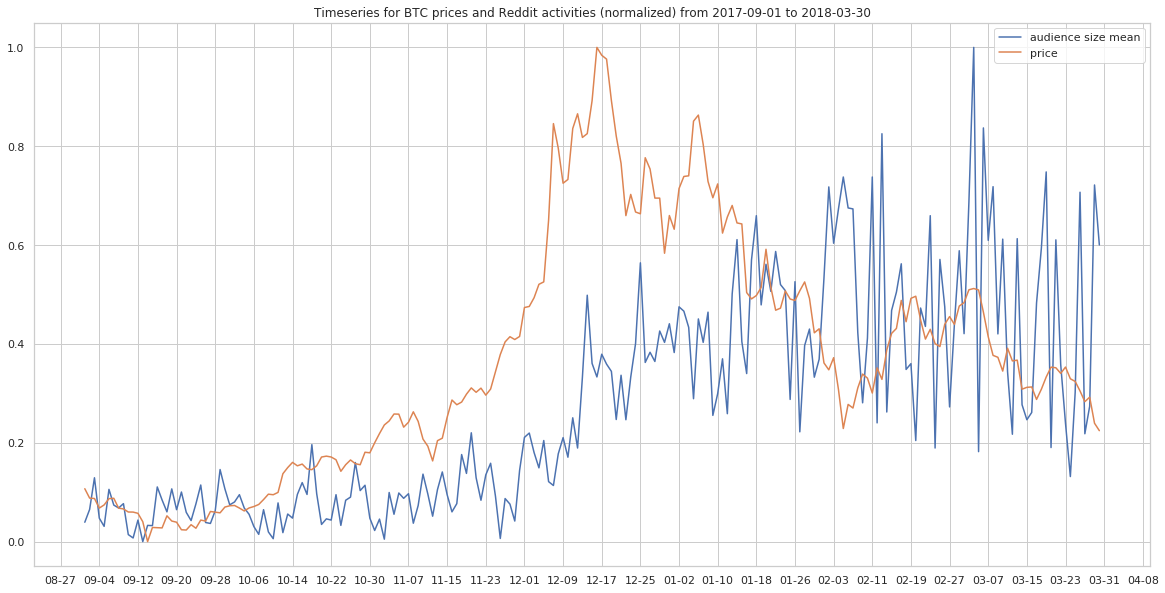

In [512]:
##plt all timeseries means in one chart
fig, ax = plt.subplots(figsize=(20,10))
#plt.plot(Y, initial_delays_means_norm, label='initial delay mean')
#plt.plot(Y, lifetimes_means_norm, label='lifetime mean')
#plt.plot(Y, volume_of_cascades_means_norm, label='volume mean')
#plt.plot(Y, density_of_cascades_means_norm, label='density of cascades mean')
plt.plot(Y, audience_size_of_cascades_means_norm, label='audience size mean')

plt.plot(Y, price_X_norm, label='price')
format_xdata = mdates.DateFormatter('%m-%d')

max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)
#ax.set_ylim(bottom=0)
plt.title("Timeseries for BTC prices and Reddit activities (normalized) from 2017-09-01 to 2018-03-30")
plt.legend()
fig.savefig('plots/audience_size_price_20170901_20180330.png', dpi=fig.dpi)

In [265]:
start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

print("Found", len(components), "components")

audience_size_of_cascades_means = dict()
volume_of_cascades_means = dict()

for day in Y:
    audience_size_of_cascades = []
    volume_of_cascades = []
    cascades_count=0
    
    for i, c in enumerate(components) :
        c_subgraph = cascades.subgraph(c)

        authors_set = set()
        active_cascade = False
        
        for n in c_subgraph.nodes:
            node_created_date = None
            if 'created_utc' in c_subgraph.nodes[n]:
                epoch = int(c_subgraph.nodes[n]['created_utc'])
                node_created_date = datetime.datetime.utcfromtimestamp(epoch).date()

            if node_created_date is not None and node_created_date == day:
                active_cascade = True
                
            if 'author' in c_subgraph.nodes[n]:
                authors_set.add(c_subgraph.nodes[n]['author'])
        
        cascade_size = len(c_subgraph.nodes)
        if active_cascade and cascade_size > 1:
            #It is an active cascade!! There's an initial post, first comment, and the initial delay is non-negative
            cascades_count += 1
            audience_size_of_cascades.append(len(authors_set))    
            volume_of_cascades.append(cascade_size)
            
    print("Day:", day)
    print("Number of cascades: ", cascades_count,
         "Average audidence size:", round(mean(audience_size_of_cascades), 2),
         "Average volume:", round(mean(volume_of_cascades), 2)
         )
    
    audience_size_of_cascades_means[day] = round(mean(audience_size_of_cascades), 2)
    volume_of_cascades_means[day] = round(mean(volume_of_cascades), 2)

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-04 18:13:49.711431
Found 208511 components
Day: 2017-09-01
Number of cascades:  727 Average audidence size: 18.1 Average volume: 35.42
Day: 2017-09-02
Number of cascades:  642 Average audidence size: 19.24 Average volume: 36.49
Day: 2017-09-03
Number of cascades:  550 Average audidence size: 22.19 Average volume: 43.4
Day: 2017-09-04
Number of cascades:  611 Average audidence size: 18.26 Average volume: 35.21
Day: 2017-09-05
Number of cascades:  628 Average audidence size: 17.17 Average volume: 34.46
Day: 2017-09-06
Number of cascades:  601 Average audidence size: 19.3 Average volume: 37.61
Day: 2017-09-07
Number of cascades:  513 Average audidence size: 19.61 Average volume: 39.63
Day: 2017-09-08
Number of cascades:  515 Average audidence size: 19.18 Average volume: 36.83
Day: 2017-09-09
Number of cascades:  459 Average audidence size: 21.09 Average volume: 42.72
Day: 2017-09-10
Number of cascades:  493 Average audidence size: 20.72 Average volume: 41.13
Day: 2017-

Day: 2017-11-28
Number of cascades:  2143 Average audidence size: 17.11 Average volume: 33.18
Day: 2017-11-29
Number of cascades:  3505 Average audidence size: 15.06 Average volume: 27.86
Day: 2017-11-30
Number of cascades:  2214 Average audidence size: 20.95 Average volume: 39.73
Day: 2017-12-01
Number of cascades:  1621 Average audidence size: 24.42 Average volume: 46.9
Day: 2017-12-02
Number of cascades:  1460 Average audidence size: 25.81 Average volume: 50.23
Day: 2017-12-03
Number of cascades:  1506 Average audidence size: 23.53 Average volume: 44.79
Day: 2017-12-04
Number of cascades:  1553 Average audidence size: 23.41 Average volume: 43.03
Day: 2017-12-05
Number of cascades:  1450 Average audidence size: 25.0 Average volume: 46.93
Day: 2017-12-06
Number of cascades:  2326 Average audidence size: 19.74 Average volume: 36.37
Day: 2017-12-07
Number of cascades:  3420 Average audidence size: 20.6 Average volume: 37.66
Day: 2017-12-08
Number of cascades:  2756 Average audidence siz

Day: 2018-02-24
Number of cascades:  421 Average audidence size: 24.76 Average volume: 46
Day: 2018-02-25
Number of cascades:  374 Average audidence size: 41.49 Average volume: 80.53
Day: 2018-02-26
Number of cascades:  425 Average audidence size: 35.0 Average volume: 66.38
Day: 2018-02-27
Number of cascades:  486 Average audidence size: 31.47 Average volume: 61.97
Day: 2018-02-28
Number of cascades:  473 Average audidence size: 29.86 Average volume: 54.08
Day: 2018-03-01
Number of cascades:  460 Average audidence size: 36.32 Average volume: 71.95
Day: 2018-03-02
Number of cascades:  441 Average audidence size: 34.79 Average volume: 67.73
Day: 2018-03-03
Number of cascades:  371 Average audidence size: 33.48 Average volume: 60.74
Day: 2018-03-04
Number of cascades:  311 Average audidence size: 44.94 Average volume: 80.66
Day: 2018-03-05
Number of cascades:  393 Average audidence size: 27.71 Average volume: 51.23
Day: 2018-03-06
Number of cascades:  381 Average audidence size: 39.41 Ave

In [273]:
audience_size_of_cascades_means_str_keys = {k.isoformat(): v for k, v in audience_size_of_cascades_means.items()}

In [274]:
import json

json = json.dumps(audience_size_of_cascades_means_str_keys)
f = open("audience_size_of_cascades_means_dict_20170901_20180330.json","w")
f.write(json)
f.close()

In [275]:
volume_of_cascades_means_str_keys = {k.isoformat(): v for k, v in volume_of_cascades_means.items()}

In [276]:
import json
json_dump = json.dumps(volume_of_cascades_means_str_keys)
f = open("volume_of_cascades_means_dict_20170901_20180330.json","w")
f.write(json_dump)
f.close()

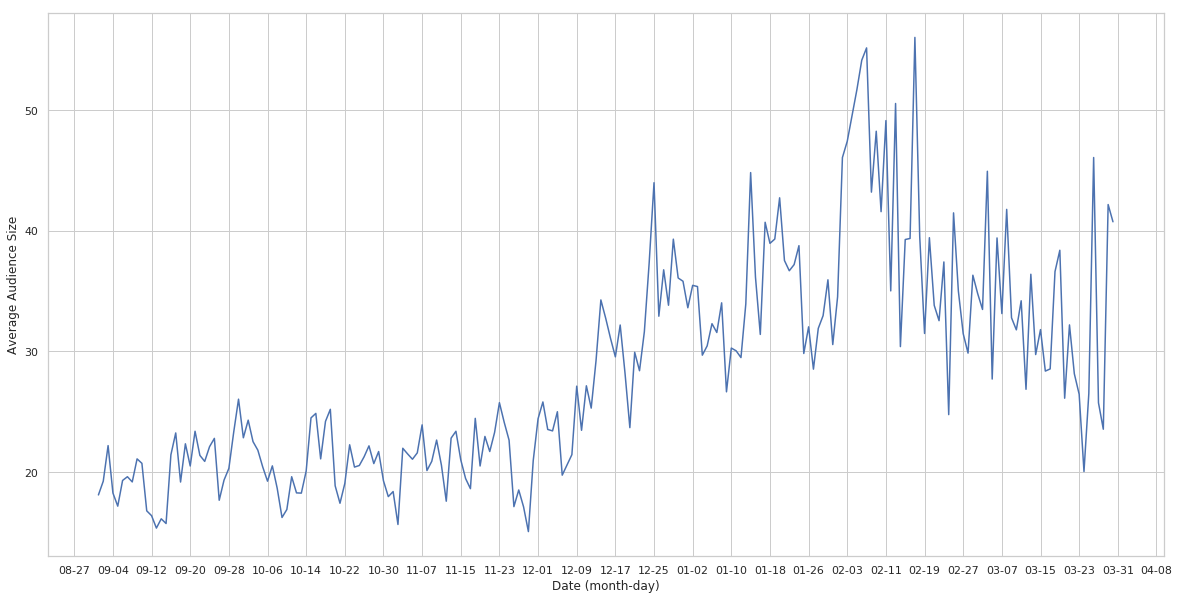

In [280]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(audience_size_of_cascades_means.keys(), audience_size_of_cascades_means.values())
plt.xlabel('Date (month-day)')
plt.ylabel('Average Audience Size')

format_xdata = mdates.DateFormatter('%m-%d')

max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)


plt.show()
fig.savefig('plots/audience_size_0901_0330.png', dpi=fig.dpi)

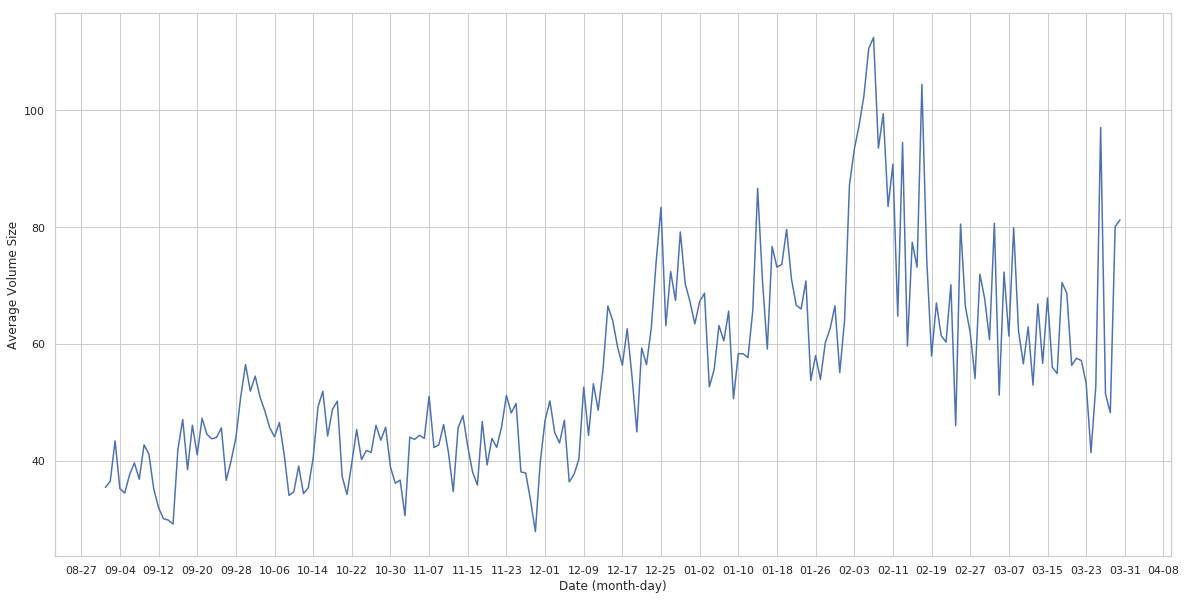

In [281]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(volume_of_cascades_means.keys(), volume_of_cascades_means.values())
plt.xlabel('Date (month-day)')
plt.ylabel('Average Volume Size')

format_xdata = mdates.DateFormatter('%m-%d')

max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)

plt.show()
fig.savefig('plots/volume_0901_0330.png', dpi=fig.dpi)

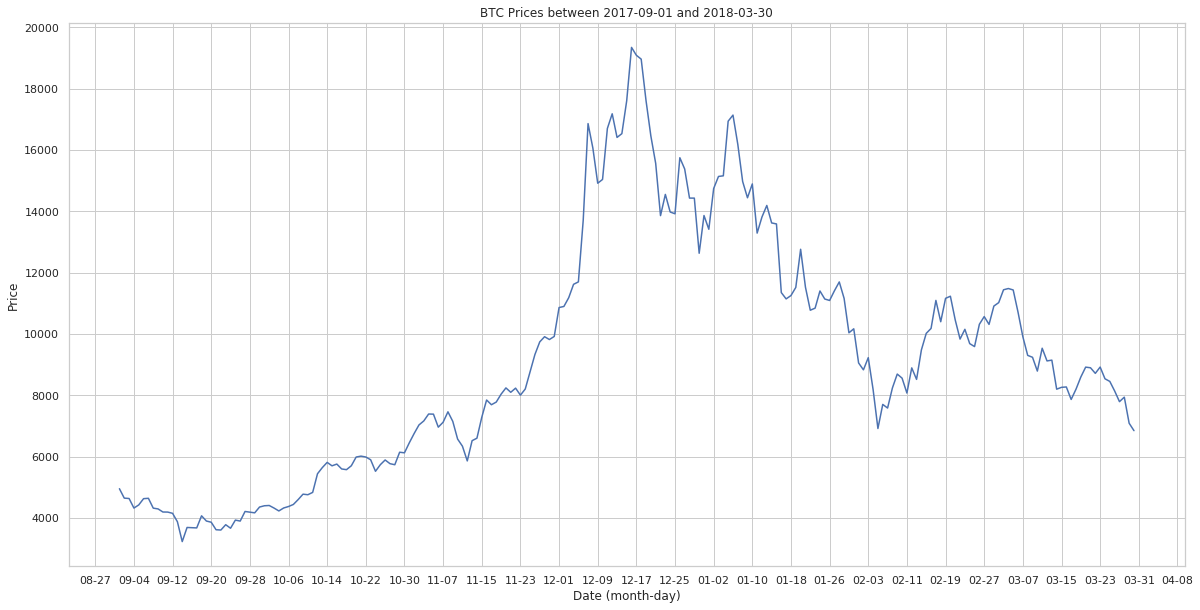

In [282]:
start=list(audience_size_of_cascades_means.keys())[0]
end=list(audience_size_of_cascades_means.keys())[-1]

Y_short = list(filter(lambda x: x <= end and x >= start, Y))
X_short = list([prices_dic[k.isoformat()] for k in Y_short])

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(Y_short, X_short)
plt.xlabel('Date (month-day)')
plt.ylabel('Price')
plt.title('BTC Prices between ' + start.isoformat() + ' and ' + end.isoformat())

format_xdata = mdates.DateFormatter('%m-%d')

max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)


plt.show()
fig.savefig('plots/btc_price_0901_0330.png', dpi=fig.dpi)

In [304]:
len(X_short)

211

In [351]:
x_norm_audience = normalize(np.array(list(audience_size_of_cascades_means.values())))
x_norm_volume = normalize(np.array(list(volume_of_cascades_means.values())))
x_norm_price = normalize(np.array(X_short))

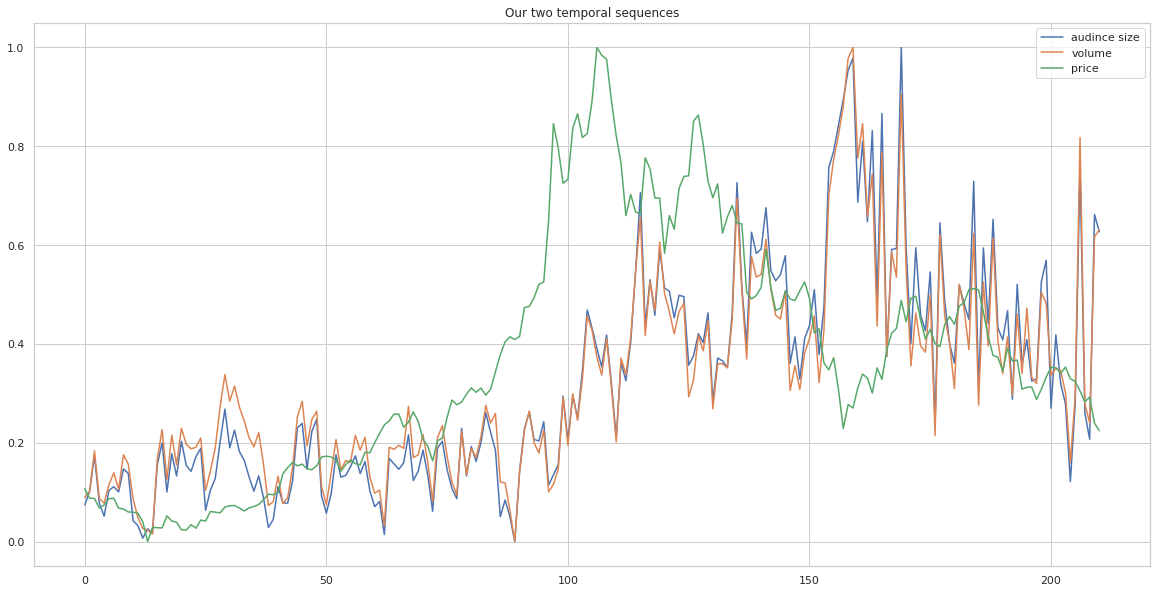

In [369]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x_norm_audience, label='audince size')
plt.plot(x_norm_volume, label='volume')
plt.plot(x_norm_price, label='price')
plt.title('Our two temporal sequences')
plt.legend()
fig.savefig('plots/volume_audience_price_0901_0330.png', dpi=fig.dpi)

In [367]:
s = 0
s_1 = 0
for i,v in enumerate(x_norm_audience):
    s += abs(x_norm_audience[i] - x_norm_volume[i])
    s_1 += abs(x_norm_audience[i] - x_norm_price[i])
    
print(s)
print(s/(len(x_norm_audience)*2))

print(s_1)
print(s_1/(len(x_norm_audience)*2))

6.78267287237723
0.016072684531699598
37.8218382245423
0.08962520906289644


In [368]:
from dtw import dtw, accelerated_dtw

euclidean_norm = lambda x, y: np.abs(x - y)

d, cost_matrix, acc_cost_matrix, path = dtw(x_norm_audience, x_norm_volume, dist=euclidean_norm)
#d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(x, y, dist=euclidean_norm)
print("The DTW of volume and audience size:", round(d, 4))

d, cost_matrix, acc_cost_matrix, path = dtw(x_norm_price, x_norm_audience, dist=euclidean_norm)
print("The DTW of price and audience size:", round(d, 4))

d, cost_matrix, acc_cost_matrix, path = dtw(x_norm_price, x_norm_volume, dist=euclidean_norm)
print("The DTW of price and volume:", round(d, 4))

The DTW of volume and audience size: 0.0143
The DTW of price and audience size: 0.0386
The DTW of price and volume: 0.0391


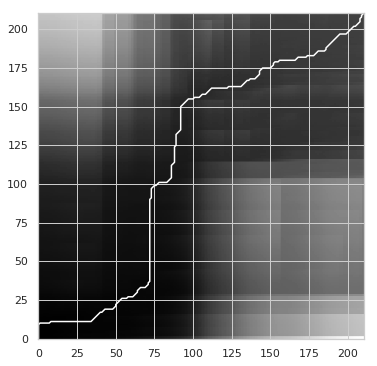

In [359]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

In [364]:
#using fastdtw

from fastdtw import fastdtw
import numpy as np

euclidean = lambda x, y: np.abs(x - y)

distance, path = fastdtw(x_norm_audience, x_norm_volume, dist=euclidean, radius=211)

print(distance)

6.034147610849869


In [318]:
def normalize(arr):
    result = arr.copy()
    max_value = arr.max()
    min_value = arr.min()
    result = (arr - min_value) / (max_value - min_value)
    return result

In [374]:
import copy

cascades_cp = copy.deepcopy(cascades)

In [375]:
## Looking at all cascades as a whole instead of averages

print("Starting at " + str(datetime.datetime.now()))

audience_size_dic = dict()
volume_dic= dict()
removed_nodes = set()

for day in Y[60:150]:
    volume = 0 #number of comments + posts
    authors_set = set()
    
    for n in cascades_cp.nodes:
        if n in removed_nodes:
            continue
            
        node_created_date = None
        if 'created_utc' in cascades_cp.nodes[n]:
            epoch = int(cascades_cp.nodes[n]['created_utc'])
            node_created_date = datetime.datetime.utcfromtimestamp(epoch).date()

        if node_created_date is not None and node_created_date == day:
            volume += 1
            if 'author' in cascades_cp.nodes[n]:
                authors_set.add(cascades_cp.nodes[n]['author'])
            removed_nodes.add(n)
            
    print("Day:", day, str(datetime.datetime.now()))
    print("Volume (number of comment + posts): ", volume,
          "Audience size: ", len(authors_set)
         )
    
    audience_size_dic[day] = len(authors_set)
    volume_dic[day] = volume

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-08 15:20:44.195847
Day: 2017-10-31 2019-10-08 15:20:54.086412
Volume (number of comment + posts):  8895 Audience size:  3049
Day: 2017-11-01 2019-10-08 15:21:03.835925
Volume (number of comment + posts):  10716 Audience size:  3523
Day: 2017-11-02 2019-10-08 15:21:13.650621
Volume (number of comment + posts):  14556 Audience size:  4407
Day: 2017-11-03 2019-10-08 15:21:23.513229
Volume (number of comment + posts):  12069 Audience size:  3671
Day: 2017-11-04 2019-10-08 15:21:33.298016
Volume (number of comment + posts):  9385 Audience size:  3116
Day: 2017-11-05 2019-10-08 15:21:42.956889
Volume (number of comment + posts):  9504 Audience size:  2928
Day: 2017-11-06 2019-10-08 15:21:52.692510
Volume (number of comment + posts):  10376 Audience size:  3418
Day: 2017-11-07 2019-10-08 15:22:02.374823
Volume (number of comment + posts):  9459 Audience size:  2853
Day: 2017-11-08 2019-10-08 15:22:12.447010
Volume (number of comment + posts):  13025 Audience size:  3839
Da

Day: 2018-01-16 2019-10-08 15:31:16.213824
Volume (number of comment + posts):  16835 Audience size:  6114
Day: 2018-01-17 2019-10-08 15:31:22.166170
Volume (number of comment + posts):  19102 Audience size:  6879
Day: 2018-01-18 2019-10-08 15:31:27.991738
Volume (number of comment + posts):  9305 Audience size:  3750
Day: 2018-01-19 2019-10-08 15:31:33.804880
Volume (number of comment + posts):  8539 Audience size:  3429
Day: 2018-01-20 2019-10-08 15:31:39.322838
Volume (number of comment + posts):  7155 Audience size:  2739
Day: 2018-01-21 2019-10-08 15:31:44.886696
Volume (number of comment + posts):  7192 Audience size:  2795
Day: 2018-01-22 2019-10-08 15:31:50.375519
Volume (number of comment + posts):  9904 Audience size:  3800
Day: 2018-01-23 2019-10-08 15:31:55.901722
Volume (number of comment + posts):  9118 Audience size:  3547
Day: 2018-01-24 2019-10-08 15:32:01.416354
Volume (number of comment + posts):  8275 Audience size:  3318
Day: 2018-01-25 2019-10-08 15:32:06.982365
V

In [376]:
Y_90 = Y[60:150]
X_90 = list([prices_dic[k.isoformat()] for k in Y_90])

In [382]:
audience_90_norm = normalize(np.array(list(audience_size_dic.values())))
volume_90_norm = normalize(np.array(list(volume_dic.values())))
price_90_norm = normalize(np.array(X_90))

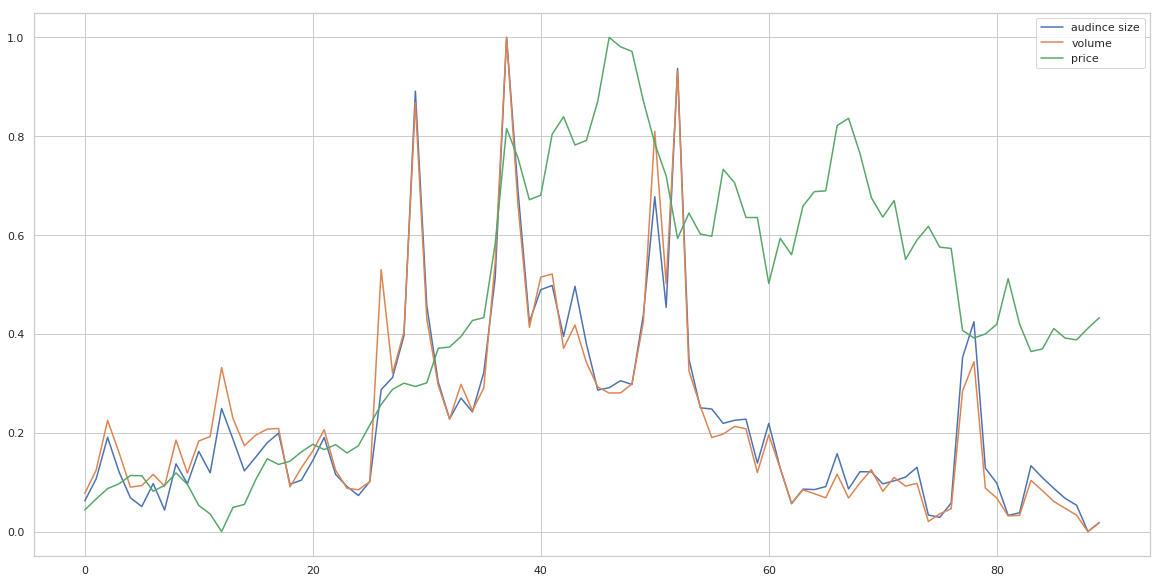

In [383]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(audience_90_norm, label='audince size')
plt.plot(volume_90_norm, label='volume')
plt.plot(price_90_norm, label='price')
plt.legend()
fig.savefig('plots/volume_audience_whole_graph_price_1031_0128.png', dpi=fig.dpi)

In [384]:
d, cost_matrix, acc_cost_matrix, path = dtw(audience_90_norm, volume_90_norm, dist=euclidean_norm)

print("The DTW of volume and audience size:", round(d, 4))

d, cost_matrix, acc_cost_matrix, path = dtw(price_90_norm, audience_90_norm, dist=euclidean_norm)
print("The DTW of price and audience size:", round(d, 4))

d, cost_matrix, acc_cost_matrix, path = dtw(price_90_norm, volume_90_norm, dist=euclidean_norm)
print("The DTW of price and volume:", round(d, 4))

The DTW of volume and audience size: 0.0125
The DTW of price and audience size: 0.092
The DTW of price and volume: 0.0974


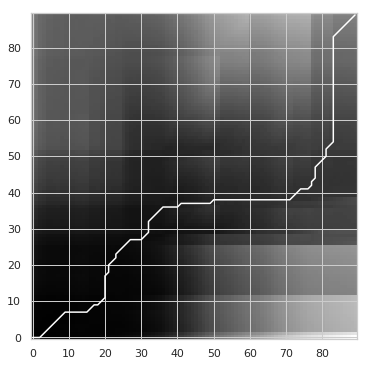

In [385]:
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()

In [386]:
len(submissions)

1750123

In [387]:
## Looking at all cascades as a whole instead of averages

print("Starting at " + str(datetime.datetime.now()))

sub_audience_size_dic = dict()
sub_volume_dic= dict()
sub_removed_nodes = set()

for day in Y[60:150]:
    volume = 0 #number of submissions
    authors_set = set()
    
    for s in submissions:
        
        if s in sub_removed_nodes:
            continue
            
        node_created_date = None
        author = None
        subreddit = None
        
        try:
            epoch = int(submissions[s]['time'])
            subreddit = submissions[s]['subreddit']
            author = submissions[s]['author']

        except TypeError:
            corupt_sub_counter += 1
        
        if subreddit is None or subreddit.lower() != 'bitcoin':
            sub_removed_nodes.add(s)
            continue
            
        created_date = datetime.datetime.utcfromtimestamp(epoch).date()
        if created_date is not None and created_date == day:
            volume += 1
            if author is not None:
                authors_set.add(author)                
            sub_removed_nodes.add(s)
            
    print("Day:", day)
    print("Volume (number of submissions): ", volume,
          "Audience size: ", len(authors_set)
         )
    
    sub_audience_size_dic[day] = len(authors_set)
    sub_volume_dic[day] = volume

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-08 16:11:43.332623
Day: 2017-10-31
Volume (number of submissions):  834 Audience size:  627
Day: 2017-11-01
Volume (number of submissions):  1031 Audience size:  757
Day: 2017-11-02
Volume (number of submissions):  1502 Audience size:  1025
Day: 2017-11-03
Volume (number of submissions):  1030 Audience size:  721
Day: 2017-11-04
Volume (number of submissions):  734 Audience size:  542
Day: 2017-11-05
Volume (number of submissions):  717 Audience size:  549
Day: 2017-11-06
Volume (number of submissions):  786 Audience size:  603
Day: 2017-11-07
Volume (number of submissions):  776 Audience size:  558
Day: 2017-11-08
Volume (number of submissions):  1133 Audience size:  779
Day: 2017-11-09
Volume (number of submissions):  892 Audience size:  643
Day: 2017-11-10
Volume (number of submissions):  1031 Audience size:  709
Day: 2017-11-11
Volume (number of submissions):  1176 Audience size:  757
Day: 2017-11-12
Volume (number of submissions):  1679 Audience size:  1092
Day

In [388]:
sub_audience_90_norm = normalize(np.array(list(sub_audience_size_dic.values())))
sub_volume_90_norm = normalize(np.array(list(sub_volume_dic.values())))

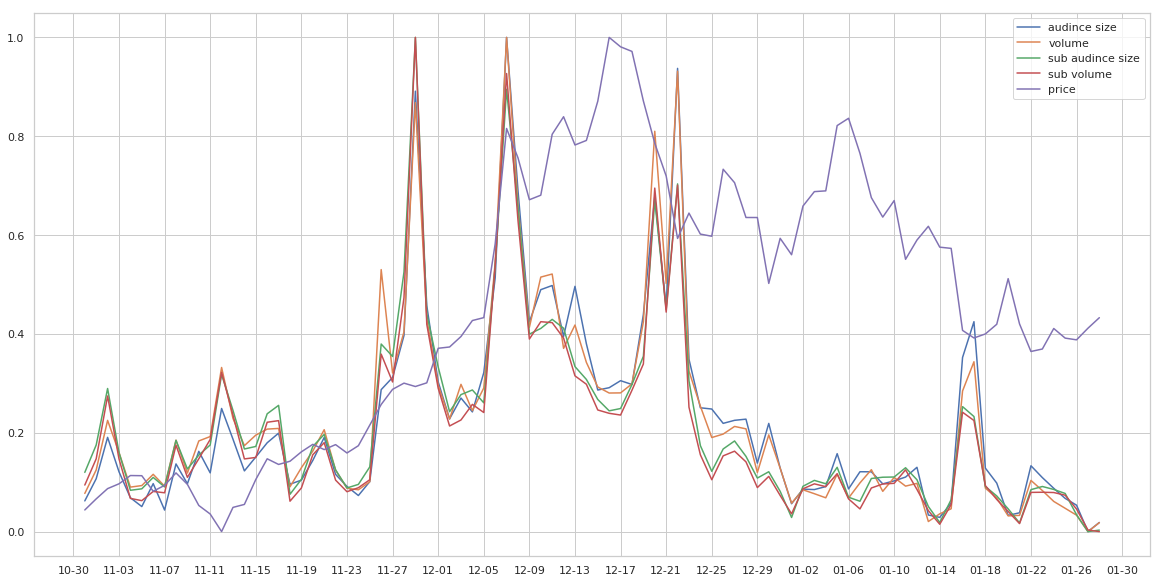

In [396]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(Y_90, audience_90_norm, label='audince size')
plt.plot(Y_90, volume_90_norm, label='volume')
plt.plot(Y_90, sub_audience_90_norm, label='sub audince size')
plt.plot(Y_90, sub_volume_90_norm, label='sub volume')
plt.plot(Y_90, price_90_norm, label='price')
format_xdata = mdates.DateFormatter('%m-%d')

max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)

plt.legend()
fig.savefig('plots/volume_audience_submissions_from_dic_price_1031_0128.png', dpi=fig.dpi)

In [397]:
start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

api_base_url = 'https://api.coindesk.com/v1/bpi/historical/close.json'
big_start_date='2017-01-01'
big_end_date='2018-06-30'
big_params='?start=' + big_start_date + '&end=' + big_end_date

big_url = api_base_url + big_params
print("URL:", big_url)

r = requests.get(url = big_url)
if r.status_code == 200:
    big_prices_json_obj = json.loads(r.text)
    big_prices_dic = big_prices_json_obj['bpi']

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-08 16:56:00.514437
URL: https://api.coindesk.com/v1/bpi/historical/close.json?start=2017-01-01&end=2018-06-30
Finished at 2019-10-08 16:56:00.705345
Total time: --- 0.1911 seconds ---


In [398]:
big_Y = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date(), big_prices_dic.keys()))

In [403]:
len(comments)

20649321

In [412]:
## Looking at all cascades as a whole instead of averages

print("Starting at " + str(datetime.datetime.now()))

big_sub_audience_size_dic = dict()
big_sub_volume_dic= dict()
big_sub_removed_nodes = set()

big_com_audience_size_dic = dict()
big_com_volume_dic= dict()
big_com_removed_nodes = set()

day_counter = 0

with open ("bitcoin_subs_from_dic_20170101_20180630.txt", "w") as s_f, open("bitcoin_coms_from_dic_20170101_20180630.txt", "w") as c_f:
    
    for day in big_Y:

        corupt_sub_counter=0
        s_volume = 0 #number of submissions
        s_authors_set = set()

        ## submissions
        for s in submissions:

            if s in big_sub_removed_nodes:
                continue

            s_author = None
            s_subreddit = None

            try:
                s_epoch = int(submissions[s]['time'])
                s_subreddit = submissions[s]['subreddit']
                s_author = submissions[s]['author']

            except TypeError:
                corupt_sub_counter += 1

            if s_subreddit is None or s_subreddit.lower() != 'bitcoin':
                big_sub_removed_nodes.add(s)
                continue

            s_created_date = datetime.datetime.utcfromtimestamp(s_epoch).date()

            if s_created_date is not None and s_created_date == day:
                s_volume += 1
                if s_author is not None:
                    s_authors_set.add(s_author)   
                    
                s_f.write(str(submissions[s]) + "\n")
                big_sub_removed_nodes.add(s)


        corupt_com_counter=0
        c_volume = 0 #number of submissions
        c_authors_set = set()
        ## Comments
        for c in comments:

            if c in big_com_removed_nodes:
                continue

            c_author = None
            c_subreddit = None

            try:
                c_epoch = int(comments[c]['time'])
                c_subreddit = comments[c]['subreddit']
                c_author = comments[c]['author_id']

            except TypeError:
                corupt_com_counter += 1

            if c_subreddit is None or c_subreddit.lower() != 'bitcoin':
                big_com_removed_nodes.add(c)
                continue

            c_created_date = datetime.datetime.utcfromtimestamp(c_epoch).date()

            if c_created_date is not None and c_created_date == day:
                c_volume += 1
                if c_author is not None:
                    c_authors_set.add(c_author)   
                    
                c_f.write(str(comments[c]) + "\n")
                big_com_removed_nodes.add(c)


        if day_counter % 20 == 0:
            print(str(datetime.datetime.now()))
            print("Day:", day)
            print("Submissions Volume: ", s_volume,
                  "Submissions Audience size: ", len(s_authors_set),
                  "Comments Volume: ", c_volume,
                  "Comments Audience size: ", len(c_authors_set)
                 )

        day_counter += 1
        big_sub_audience_size_dic[day] = len(s_authors_set)
        big_sub_volume_dic[day] = s_volume

        big_com_audience_size_dic[day] = len(c_authors_set)
        big_com_volume_dic[day] = c_volume

print("Finished at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-08 17:55:49.843157
2019-10-08 17:56:52.922188
Day: 2017-01-01
Submissions Volume:  323 Submissions Audience size:  229 Comments Volume:  3024 Comments Audience size:  1018
2019-10-08 18:09:00.873240
Day: 2017-01-21
Submissions Volume:  143 Submissions Audience size:  104 Comments Volume:  1973 Comments Audience size:  742
2019-10-08 18:21:02.453147
Day: 2017-02-10
Submissions Volume:  260 Submissions Audience size:  198 Comments Volume:  2849 Comments Audience size:  965
2019-10-08 18:32:56.630906
Day: 2017-03-02
Submissions Volume:  433 Submissions Audience size:  308 Comments Volume:  3676 Comments Audience size:  1224
2019-10-08 18:44:52.590884
Day: 2017-03-22
Submissions Volume:  396 Submissions Audience size:  269 Comments Volume:  4851 Comments Audience size:  1157
2019-10-08 18:56:41.053065
Day: 2017-04-11
Submissions Volume:  235 Submissions Audience size:  176 Comments Volume:  2136 Comments Audience size:  730
2019-10-08 19:08:26.994354
Day: 2017-05-01
Sub

In [413]:
big_X = list([big_prices_dic[k.isoformat()] for k in big_Y])
big_price_norm = normalize(np.array(big_X))

In [414]:
big_sub_audience_norm = normalize(np.array(list(big_sub_audience_size_dic.values())))
big_sub_volume_norm = normalize(np.array(list(big_sub_volume_dic.values())))

big_com_audience_norm = normalize(np.array(list(big_com_audience_size_dic.values())))
big_com_volume_norm = normalize(np.array(list(big_com_volume_dic.values())))

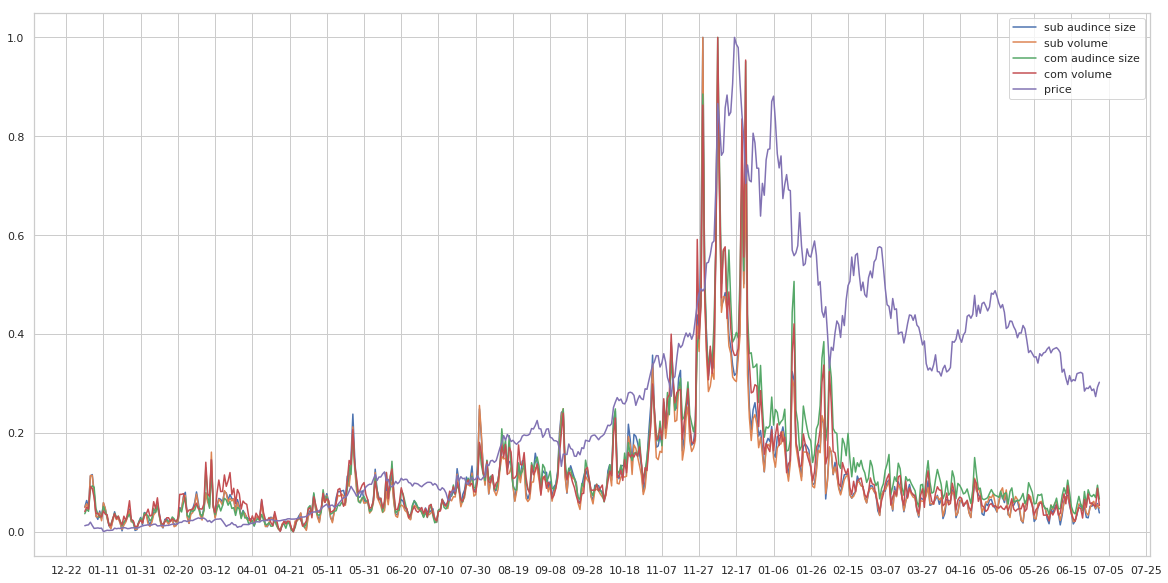

In [415]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(big_Y, big_sub_audience_norm, label='sub audince size')
plt.plot(big_Y, big_sub_volume_norm, label='sub volume')

plt.plot(big_Y, big_com_audience_norm, label='com audince size')
plt.plot(big_Y, big_com_volume_norm, label='com volume')

plt.plot(big_Y, big_price_norm, label='price')
format_xdata = mdates.DateFormatter('%m-%d')

max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)

plt.legend()
fig.savefig('plots/volume_audience_submissions_n_comments_from_dic_price_0101_0630.png', dpi=fig.dpi)

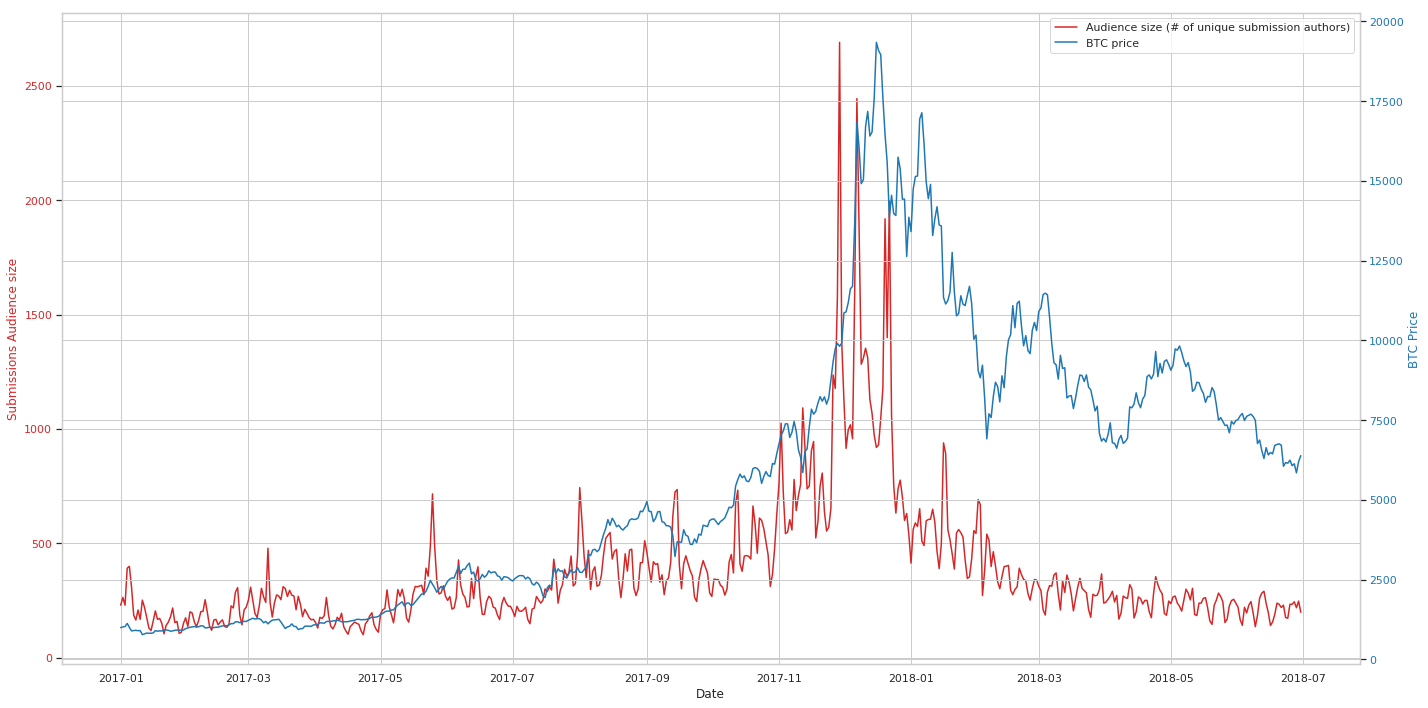

In [443]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Date')

# ax1.set_ylabel('# of comments', color=color)
# l1, = ax1.plot(big_Y, np.array(list(big_com_volume_dic.values())), color=color)
#ax1.set_ylabel('Comments Audience size', color=color)
#l1, = ax1.plot(big_Y, np.array(list(big_com_audience_size_dic.values())), color=color)
#ax1.set_ylabel('# of submissions', color=color)
#l1, = ax1.plot(big_Y, np.array(list(big_sub_volume_dic.values())), color=color)
ax1.set_ylabel('Submissions Audience size', color=color)
l1, = ax1.plot(big_Y, np.array(list(big_sub_audience_size_dic.values())), color=color)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('BTC Price', color=color)  # we already handled the x-label with ax1
l2, = ax2.plot(big_Y, np.array(big_X), color=color)
ax2.tick_params(axis='y', labelcolor=color)

#plt.legend([l1, l2], ["Volume (# of comments)", "BTC price"])
#plt.legend([l1, l2], ["Audience size (# of unique commenters)", "BTC price"])
#plt.legend([l1, l2], ["Volume (# of submissions)", "BTC price"])
plt.legend([l1, l2], ["Audience size (# of unique submission authors)", "BTC price"])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#fig.savefig('plots/volume_comments_from_dic_n_price_not_normalized_0101_0630.png', dpi=fig.dpi)
#fig.savefig('plots/audience_size_comments_from_dic_n_price_not_normalized_0101_0630.png', dpi=fig.dpi)
#fig.savefig('plots/volume_submissions_from_dic_n_price_not_normalized_0101_0630.png', dpi=fig.dpi)
fig.savefig('plots/audience_size_submissions_from_dic_n_price_not_normalized_0101_0630.png', dpi=fig.dpi)

plt.show()

In [445]:
### Create dataframe to be used in TCDF
import pandas as pd

d = {"volume_comments": np.array(list(big_com_volume_dic.values())),
    "audience_size_comments": np.array(list(big_com_audience_size_dic.values())),
    "volume_submissions": np.array(list(big_sub_volume_dic.values())),
    "audience_size_submissions": np.array(list(big_sub_audience_size_dic.values())),
    "btc_price": np.array(big_X)}

df = pd.DataFrame(data=d)

df.to_csv("c_vol__c_aud__s_vol__s_aud__btc_price_timeseries.csv", index=False)

In [449]:
### Create dataframe to be used in TCDF
import pandas as pd

d = {"volume_comments": np.array(list(big_com_volume_dic.values())),
    "btc_price": np.array(big_X)}

df = pd.DataFrame(data=d)

df.to_csv("c_vol__btc_price_timeseries.csv", index=False)

In [450]:
import pandas as pd

d = {"volume_comments": big_com_volume_norm,
    "audience_size_comments": big_com_audience_norm,
    "volume_submissions": big_sub_volume_norm,
    "audience_size_submissions": big_sub_audience_norm,
    "btc_price": big_price_norm}

df = pd.DataFrame(data=d)

df.to_csv("c_vol__c_aud__s_vol__s_aud__btc_price__norm__timeseries.csv", index=False)

### Gather very long dataset

In [466]:
start_time = time.time()
print("Starting at " + str(datetime.datetime.now()))

api_base_url = 'https://api.coindesk.com/v1/bpi/historical/close.json'
very_big_start_date='2016-01-01'
very_big_end_date='2018-12-31'
very_big_params='?start=' + very_big_start_date + '&end=' + very_big_end_date

very_big_url = api_base_url + very_big_params
print("URL:", very_big_url)

r = requests.get(url = very_big_url)
if r.status_code == 200:
    very_big_prices_json_obj = json.loads(r.text)
    very_big_prices_dic = very_big_prices_json_obj['bpi']

print("Finished BTC API at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))


very_big_Y = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date(), very_big_prices_dic.keys()))

## Looking at all cascades as a whole instead of averages

print("Starting at " + str(datetime.datetime.now()))

very_big_sub_audience_size_dic = dict()
very_big_sub_volume_dic= dict()
very_big_sub_removed_nodes = set()

very_big_com_audience_size_dic = dict()
very_big_com_volume_dic= dict()
very_big_com_removed_nodes = set()

day_counter = 0

with open ("bitcoin_subs_from_dic_20160101_20181231.txt", "w") as s_f, open("bitcoin_coms_from_dic_20160101_20181231.txt", "w") as c_f:
    
    for day in very_big_Y:

        corupt_sub_counter=0
        s_volume = 0 #number of submissions
        s_authors_set = set()

        ## submissions
        for s in submissions:

            if s in very_big_sub_removed_nodes:
                continue

            s_author = None
            s_subreddit = None

            try:
                s_epoch = int(submissions[s]['time'])
                s_subreddit = submissions[s]['subreddit']
                s_author = submissions[s]['author']

            except TypeError:
                corupt_sub_counter += 1

            if s_subreddit is None or s_subreddit.lower() != 'bitcoin':
                very_big_sub_removed_nodes.add(s)
                continue

            s_created_date = datetime.datetime.utcfromtimestamp(s_epoch).date()

            if s_created_date is not None and s_created_date == day:
                s_volume += 1
                if s_author is not None:
                    s_authors_set.add(s_author)   
                    
                s_f.write(str(submissions[s]) + "\n")
                very_big_sub_removed_nodes.add(s)


        corupt_com_counter=0
        c_volume = 0 #number of submissions
        c_authors_set = set()
        ## Comments
        for c in comments:

            if c in very_big_com_removed_nodes:
                continue

            c_author = None
            c_subreddit = None

            try:
                c_epoch = int(comments[c]['time'])
                c_subreddit = comments[c]['subreddit']
                c_author = comments[c]['author_id']

            except TypeError:
                corupt_com_counter += 1

            if c_subreddit is None or c_subreddit.lower() != 'bitcoin':
                very_big_com_removed_nodes.add(c)
                continue

            c_created_date = datetime.datetime.utcfromtimestamp(c_epoch).date()

            if c_created_date is not None and c_created_date == day:
                c_volume += 1
                if c_author is not None:
                    c_authors_set.add(c_author)   
                    
                c_f.write(str(comments[c]) + "\n")
                very_big_com_removed_nodes.add(c)


        if day_counter % 20 == 0:
            print(str(datetime.datetime.now()))
            print("Day:", day)
            print("Submissions Volume: ", s_volume,
                  "Submissions Audience size: ", len(s_authors_set),
                  "Comments Volume: ", c_volume,
                  "Comments Audience size: ", len(c_authors_set)
                 )

        day_counter += 1
        very_big_sub_audience_size_dic[day] = len(s_authors_set)
        very_big_sub_volume_dic[day] = s_volume

        very_big_com_audience_size_dic[day] = len(c_authors_set)
        very_big_com_volume_dic[day] = c_volume

print("Finished reading data at " + str(datetime.datetime.now()))
print("Total time: --- {0} seconds ---".format(round(time.time() - start_time, 4)))

Starting at 2019-10-18 17:19:51.609127
URL: https://api.coindesk.com/v1/bpi/historical/close.json?start=2016-01-01&end=2018-12-31
Finished BTC API at 2019-10-18 17:19:51.778543
Total time: --- 0.1696 seconds ---
Starting at 2019-10-18 17:19:51.797640
2019-10-18 17:21:01.754476
Day: 2016-01-01
Submissions Volume:  132 Submissions Audience size:  95 Comments Volume:  1508 Comments Audience size:  548
2019-10-18 17:34:00.698645
Day: 2016-01-21
Submissions Volume:  293 Submissions Audience size:  189 Comments Volume:  3309 Comments Audience size:  946
2019-10-18 17:46:43.604379
Day: 2016-02-10
Submissions Volume:  175 Submissions Audience size:  129 Comments Volume:  2082 Comments Audience size:  738
2019-10-18 17:59:26.093071
Day: 2016-03-01
Submissions Volume:  258 Submissions Audience size:  197 Comments Volume:  3793 Comments Audience size:  928
2019-10-18 18:12:06.801539
Day: 2016-03-21
Submissions Volume:  131 Submissions Audience size:  107 Comments Volume:  1471 Comments Audience s

2019-10-19 03:01:37.299510
Day: 2018-11-26
Submissions Volume:  0 Submissions Audience size:  0 Comments Volume:  0 Comments Audience size:  0
2019-10-19 03:09:48.629766
Day: 2018-12-16
Submissions Volume:  0 Submissions Audience size:  0 Comments Volume:  0 Comments Audience size:  0
Finished reading data at 2019-10-19 03:15:57.198128
Total time: --- 35765.5896 seconds ---


In [467]:
very_big_X = list([very_big_prices_dic[k.isoformat()] for k in very_big_Y])
very_big_price_norm = normalize(np.array(very_big_X))


very_big_sub_audience_norm = normalize(np.array(list(very_big_sub_audience_size_dic.values())))
very_big_sub_volume_norm = normalize(np.array(list(very_big_sub_volume_dic.values())))

very_big_com_audience_norm = normalize(np.array(list(very_big_com_audience_size_dic.values())))
very_big_com_volume_norm = normalize(np.array(list(very_big_com_volume_dic.values())))

In [468]:
very_big_prices_dic

{'2016-01-01': 434.463,
 '2016-01-02': 433.586,
 '2016-01-03': 430.361,
 '2016-01-04': 433.493,
 '2016-01-05': 432.253,
 '2016-01-06': 429.464,
 '2016-01-07': 458.28,
 '2016-01-08': 453.37,
 '2016-01-09': 449.143,
 '2016-01-10': 448.964,
 '2016-01-11': 448.385,
 '2016-01-12': 432.884,
 '2016-01-13': 432.04,
 '2016-01-14': 429.729,
 '2016-01-15': 358.766,
 '2016-01-16': 387.665,
 '2016-01-17': 380.208,
 '2016-01-18': 385.844,
 '2016-01-19': 377.745,
 '2016-01-20': 418.742,
 '2016-01-21': 409.945,
 '2016-01-22': 381.761,
 '2016-01-23': 386.191,
 '2016-01-24': 402.61,
 '2016-01-25': 390.663,
 '2016-01-26': 391.43,
 '2016-01-27': 394.629,
 '2016-01-28': 379.384,
 '2016-01-29': 378.2,
 '2016-01-30': 376.937,
 '2016-01-31': 367.135,
 '2016-02-01': 371.248,
 '2016-02-02': 372.877,
 '2016-02-03': 368.933,
 '2016-02-04': 388.612,
 '2016-02-05': 385.338,
 '2016-02-06': 375.405,
 '2016-02-07': 375.284,
 '2016-02-08': 371.101,
 '2016-02-09': 373.321,
 '2016-02-10': 379.96,
 '2016-02-11': 377.72,
 

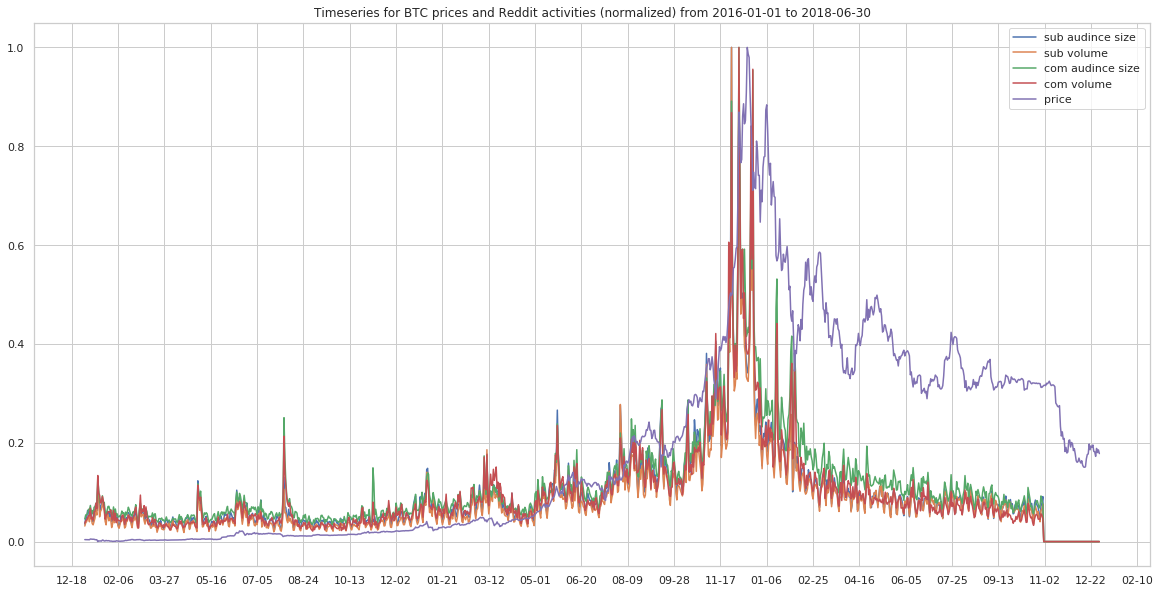

In [507]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(very_big_Y, very_big_sub_audience_norm, label='sub audince size')
plt.plot(very_big_Y, very_big_sub_volume_norm, label='sub volume')

plt.plot(very_big_Y, very_big_com_audience_norm, label='com audince size')
plt.plot(very_big_Y, very_big_com_volume_norm, label='com volume')

plt.plot(very_big_Y, very_big_price_norm, label='price')
format_xdata = mdates.DateFormatter('%m-%d')

max_yticks = 30
xloc = plt.MaxNLocator(max_yticks)
ax.xaxis.set_major_locator(xloc)
ax.xaxis.set_major_formatter(format_xdata)
plt.title("Timeseries for BTC prices and Reddit activities (normalized) from 2016-01-01 to 2018-06-30")
plt.legend()
fig.savefig('plots/volume_audience_submissions_n_comments_from_dic_price_20160101_20181231.png', dpi=fig.dpi)

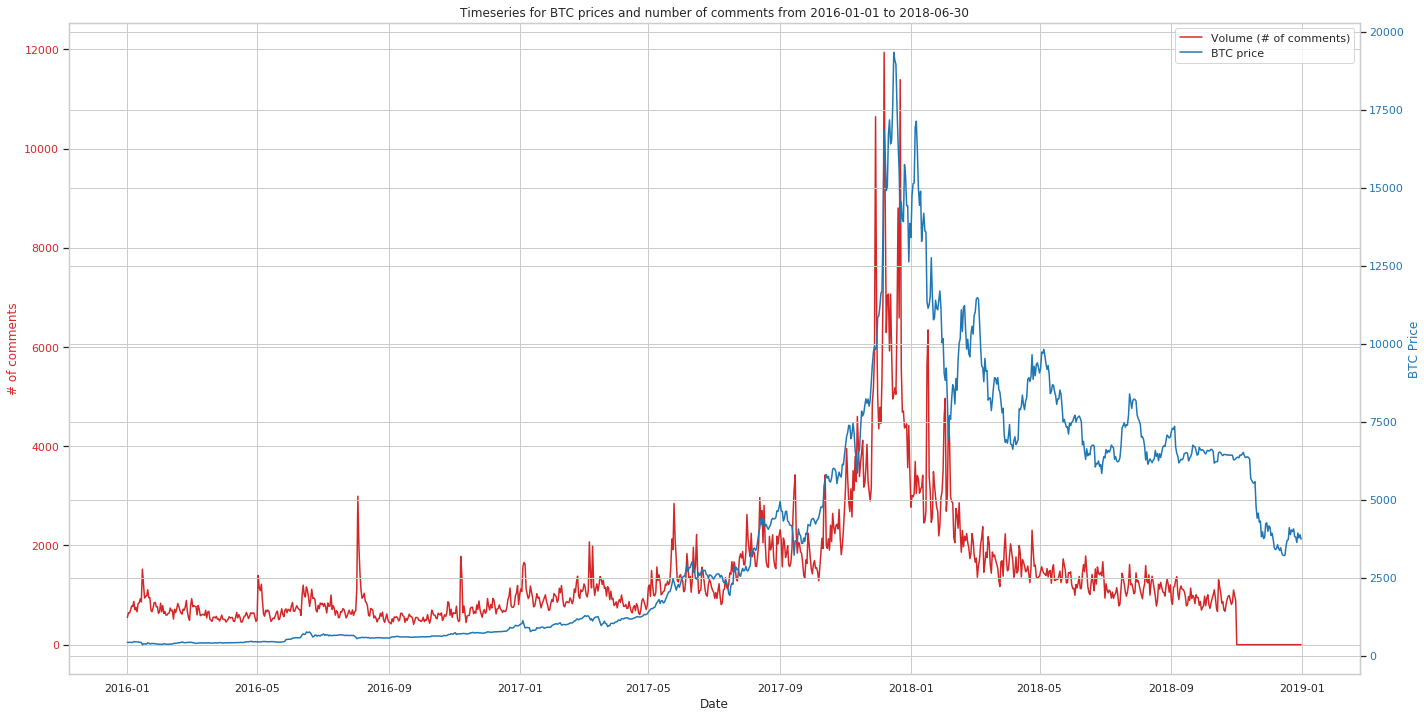

In [471]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:red'
ax1.set_xlabel('Date')

ax1.set_ylabel('# of comments', color=color)
l1, = ax1.plot(very_big_Y, np.array(list(very_big_com_audience_size_dic.values())), color=color)
#ax1.set_ylabel('Comments Audience size', color=color)
#l1, = ax1.plot(big_Y, np.array(list(big_com_audience_size_dic.values())), color=color)
#ax1.set_ylabel('# of submissions', color=color)
#l1, = ax1.plot(big_Y, np.array(list(big_sub_volume_dic.values())), color=color)
# ax1.set_ylabel('Submissions Audience size', color=color)
# l1, = ax1.plot(big_Y, np.array(list(big_sub_audience_size_dic.values())), color=color)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('BTC Price', color=color)  # we already handled the x-label with ax1
l2, = ax2.plot(very_big_Y, np.array(very_big_X), color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.legend([l1, l2], ["Volume (# of comments)", "BTC price"])
#plt.legend([l1, l2], ["Audience size (# of unique commenters)", "BTC price"])
#plt.legend([l1, l2], ["Volume (# of submissions)", "BTC price"])
#plt.legend([l1, l2], ["Audience size (# of unique submission authors)", "BTC price"])

fig.tight_layout()  # otherwise the right y-label is slightly clipped

fig.savefig('plots/volume_comments_from_dic_n_price_not_normalized_20160101_20180630.png', dpi=fig.dpi)
#fig.savefig('plots/audience_size_comments_from_dic_n_price_not_normalized_0101_0630.png', dpi=fig.dpi)
#fig.savefig('plots/volume_submissions_from_dic_n_price_not_normalized_0101_0630.png', dpi=fig.dpi)
#fig.savefig('plots/audience_size_submissions_from_dic_n_price_not_normalized_0101_0630.png', dpi=fig.dpi)

plt.title("Timeseries for BTC prices and number of comments from 2016-01-01 to 2018-06-30")
plt.show()